In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as ts
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

In [11]:
df = pdr.get_data_yahoo("AAPL")

model = keras.models.load_model('OASIS_Genesis.keras')

[*********************100%%**********************]  1 of 1 completed


In [12]:
data = df.filter(['Close'])
dataset = data.values

scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)

In [13]:
x_test = []

for i in range(60, len(scaled_data)):
    x_test.append(scaled_data[i-60:i, 0])

x_test= np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [14]:
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)
pd.DataFrame(predictions)

338/338 [==============================] - 5s 13ms/step


,0
0,0.092792
1,0.091373
2,0.089521
3,0.087475
4,0.085569
...,...
10788,190.791748
10789,190.537674
10790,190.108047
10791,189.593536


C:\Users\Brandon\AppData\Local\Temp\ipykernel_16680\1660812438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Predictions'] = predictions


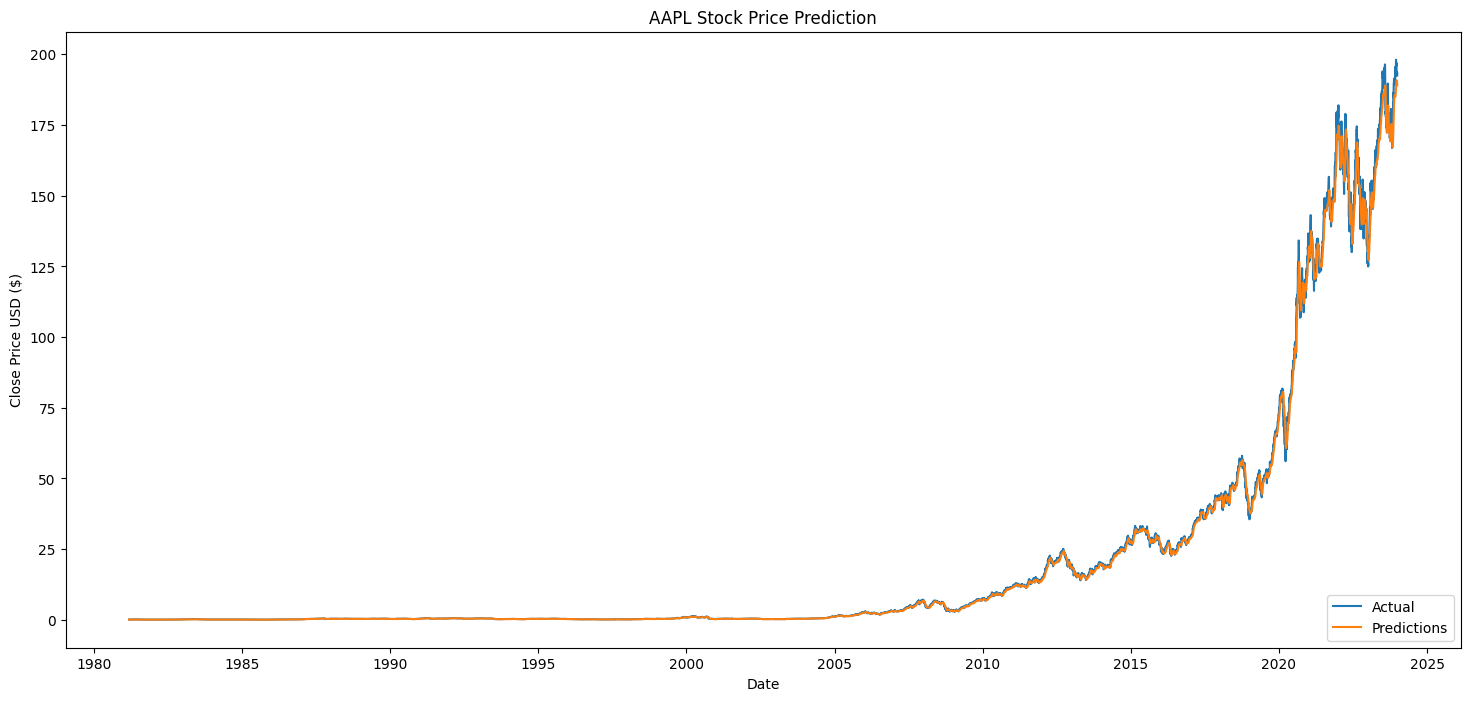

In [15]:
prices = data[60:]
prices['Predictions'] = predictions

plt.figure(figsize=(18,8))
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(prices['Close'])
plt.plot(prices['Predictions'])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [16]:
percentage_similarity = lambda close,pred: (min(close,pred)/max(close,pred))*100

prices['Similarity'] = prices.apply(lambda row: percentage_similarity(row['Close'], row['Predictions']), axis=1)
prices['Similarity'].mean()

C:\Users\Brandon\AppData\Local\Temp\ipykernel_16680\1843656343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Similarity'] = prices.apply(lambda row: percentage_similarity(row['Close'], row['Predictions']), axis=1)


91.742010243266

<Axes: xlabel='Date'>

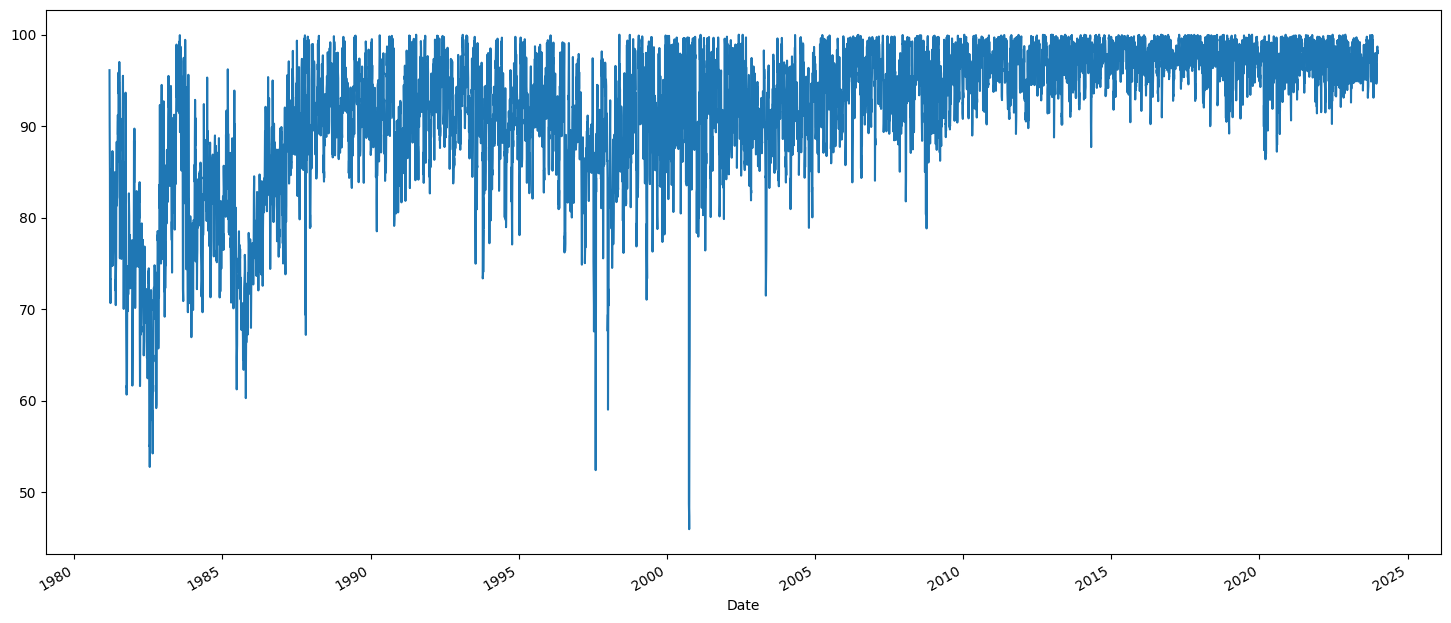

In [17]:
prices['Similarity'].plot(figsize=(18,8))